# Newton's Methods for Nonlinear Systems of Equations

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [225]:
def newton(x0,f,df,tol=1e-5,max_iter=100):
    N = np.size(x0)
    for n in range(0,max_iter):
        if N>1:
            y = -np.linalg.solve(df(x0),f(x0))
        else:
            y = -f(x0)/df(x0)
        x1 = x0 + y
        if np.linalg.norm(x1-x0)<tol:
            print("Newton's method converged in %1.f iterations" % (n-1))
            return x1
        else:
            x0 = x1
    print("Method failed to converge.")
    return []

## Example #1

Here, we would like to solve the system of equations given by 
\begin{eqnarray*}
x^3 + y &=&1\\
y^3 - x &=& -1
\end{eqnarray*}

Note, that since this is a system of equations, we want to write this in the form 
$$F(\vec{x}) = 0, \qquad F(\vec{x}) = \begin{bmatrix} x^3 + y - 1\\ y^3 - x + 1\end{bmatrix}, \qquad \vec{x} = \begin{bmatrix}x\\y\end{bmatrix}$$

Also, note that the Jacobian of $F(\vec{x})$ is given by 
$$DF(\vec{x}) = \begin{bmatrix} 3x^2 & 1\\ -1 & 3y^2\end{bmatrix}$$

In [226]:
def F_ex1(X):
    x = X[0]
    y = X[1]
    return np.array([x**3 + y - 1,y**3 - x + 1])
        
def DF_ex1(X):
    x = X[0]
    y = X[1]
    return np.array([[3*x**2,1],[-1,3*y**2]])

In [227]:
x0 = np.array([1,2])                     # set the initial guess
x = newton(x0,F_ex1,DF_ex1)              # use Newton's method
if np.size(x)<1:
    print('no solution')
else:
    error = np.linalg.norm(F_ex1(x))
    print('The numerical solution is given by x = %2.3e and y = %2.3e with |F(x)| = %2.3e' %(x[0],x[1],error))

Newton's method converged in 6 iterations
The numerical solution is given by x = 1.000e+00 and y = 3.012e-17 with |F(x)| = 0.000e+00


## Example #2: Solving Nonlinear BVPs

Here, we consider solving the boundary value problem $$u''(x) = e^{u(x)}, \qquad u(-1) = u(1) = 0.$$
In order to solve this numerically, we numerically represent the second derivative $u''(x)$ via a second-order finite difference method.

If we let $$\vec{u} = \begin{bmatrix}u_1\\u_2\\\vdots\\u_N\end{bmatrix}$$ represent the solution at $N$ data points *interior* to $x = -1$ and $x = 1$, then we can approximate $u''(x) - e^{u(x)} = 0$ as 

$$\frac{1}{h^2}\begin{bmatrix}%
     -2 & 1 & 0 & \cdots & \cdots & 0\\
     1 & -2 & 1 & \cdots & \cdots & 0\\
      & \ddots &\ddots & \ddots\\
     &&\ddots & \ddots & \ddots\\
     0 & \cdots & & 1&-2&1\\
     0 & \cdots & &0&1&-2
     \end{bmatrix}\begin{bmatrix}u_1\\u_2\\ \\ \vdots \\\\u_N\end{bmatrix}-\begin{bmatrix}e^{u_1}\\e^{u_2}\\ \\ \vdots\\\\e^{u_N}\end{bmatrix} = \vec{0}$$
     
Since our unknowns are $u_1, u_2, \ldots, u_N$, we can represent the Jacobian as 
$$DF(\vec{u}) = \frac{1}{h^2}\begin{bmatrix}%
     -2-h^2e^{u_1} & 1 & 0 & \cdots & \cdots & 0\\
     1 & -2-h^2e^{u_2} & 1 & \cdots & \cdots & 0\\
      & \ddots &\ddots & \ddots\\
     &&\ddots & \ddots & \ddots\\
     0 & \cdots & & 1&-2-h^2e^{u_{N-1}}&1\\
     0 & \cdots & &0&1&-2 - h^2e^{u_N}
     \end{bmatrix}$$

In [228]:
def F_bvp1(U):
    N = len(U)
    h = 2/(N+1)
    D2 = -2*np.diag(np.ones(N),0)
    D2 = D2 + np.diag(np.ones(N-1),-1)
    D2 = D2 + np.diag(np.ones(N-1), 1)
    D2 = D2/h**2
    return np.matmul(D2,U) - np.exp(U)
    
def DF_bvp1(U):
    N = len(U)
    h = 2/(N+1)
    D2 = -2*np.diag(np.ones(N),0)
    D2 = D2 + np.diag(np.ones(N-1),-1)
    D2 = D2 + np.diag(np.ones(N-1), 1)
    D2 = D2/h**2
    return D2 - np.diag(np.exp(U),0)

In [229]:
numPoints = 100;
x = np.linspace(-1,1,numPoints)    # create a grid spacing
xint = x[1:-1]                     # select only the interior points
U0 = -(xint-1)*(xint + 1)          # create an initial guess
UInt = newton(U0,F_bvp1,DF_bvp1)   # solve using Newton's method


Newton's method converged in 3 iterations


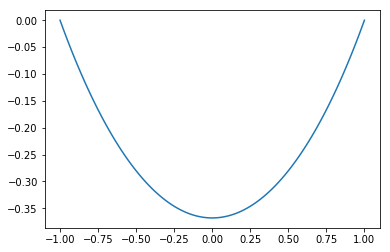

In [230]:
U = np.hstack([0,UInt, 0])
plt.plot(x,U)
plt.show()

## Example 3: Numerical Continuation and Homotopy Methods

In [244]:
def F_ex3(u):
    return (u**2 - 1)*(u**2-4) +u**2*np.exp(u/10)

def DF_ex3(u):
    return 4*u**3 -10*u +2*u*np.exp(u/10)+ u**2*np.exp(u/10)/10

u0 = .02

newton(u0,F_ex3,DF_ex3)


Newton's method converged in 53 iterations


-1.6207847468130065

In [245]:
def G(u,lam):
    return (u**2-1)*(u**2-4) + lam*(u**2)*np.exp(u/10)

def Gu(u,lam):
    return 4*u**3 - 10*u + lam*(1/10*u**2*np.exp(u/10) +2*u*np.exp(u/10))

def Glam(u,lam):
    return u**2*2*np.exp(u/10)

## Numerical Continuation

Consider solving the equation $$G(u,\lambda) = (u^2 - 1)(u^4 - 1) +\lambda\: u^2 e^{u/10} = 0$$  We know that when $\lambda = 0$, we have the solutions $u = \pm 1, \pm 2$.  We would like to see how the solutions vary as a function of $\lambda$ once $\lambda \neq 0$.  This is where numerical continuation comes into play.  Provided that $\partial_uG(u_0,\lambda_0) = 0$

In [248]:
lamVals = np.linspace(0,1.2,1001)
dlam = lamVals[1]-lamVals[0]

roots = np.zeros([len(lamVals),4])
roots[0,0:4] = np.array([-2,-1,1,2])

max_iter = 100
tol = 1e-10

for j in range(0,len(lamVals)-1):
    lam0 = lamVals[j]
    for k in range(0,4):
        u0 = roots[j,k]
        u1 = u0 - dlam*Glam(u0,lam0)/Gu(u0,lam0) # 
        for n in range(0,max_iter): # Newton Iteration Loop
            u1o = u1;
            u1 = u1 - G(u1o,lam0)/Gu(u1o,lam0)
            if np.abs(u1o-u1)<tol:
                roots[j+1,k]=u1
                break
            roots[j+1,k]=np.nan


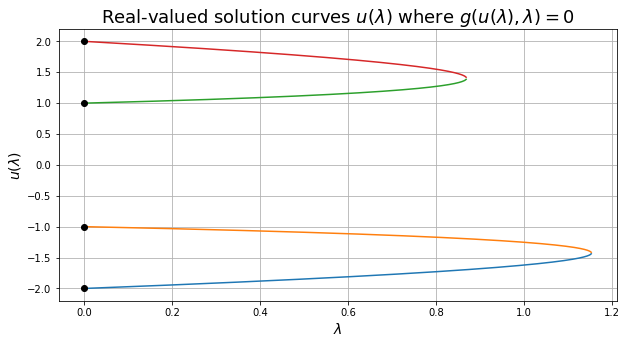

In [249]:
plt.figure(figsize=(10,5))
plt.plot(lamVals,roots)
plt.plot(np.zeros(4,),roots[0,:],'o',color='k')
plt.xlabel(r'$\lambda$',fontsize=14)
plt.ylabel(r'$u(\lambda)$',fontsize=14)
plt.title(r'Real-valued solution curves $u(\lambda)$ where $g(u(\lambda),\lambda) = 0$',fontsize=18)
plt.grid()
plt.show()